# Within Coding Assignment

This assignment will be developed using the Customer Personality Analysis dataset obtained from Kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). This dataset contains information about customers, including attributes such as age, income, education, marital status, number of children, and their spending across various product categories. It also includes information on their response to past marketing campaigns.

The objective of this project will be to perform clustering analysis to divide customers into segments and help marketing teams prioritize high-potential customers and optimize campaign targeting strategies, ultimately improving return on marketing investment.

The dataset contains the following variables:

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## Data cleaning and Exploratory Data Analysis

First, we will begin by importing all the required libraries for the project

In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

Now, we will import the dataset that will be used for the task

In [32]:
data = pd.read_csv("./marketing_campaign.csv", sep = "\t")

After loading the dataset, we will begin exploring the dataset, transforming the data, and building some new features that will be used later in the model development section. First, lets review the datatypes for each of the columns in case it is required to transform any of them:

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can see that the variable "Dt_Customer" needs to be transformed to date time format. Also, the "Income" column contains some rows with Null values, these rows will be removed from the dataset.

In [34]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

data = data.dropna(subset = "Income")

This allows us to calculate the total time each person has been a client for the company. This is achieved with the following code:

In [35]:
data["Customer_For"] = (pd.to_datetime("today") - data["Dt_Customer"]).dt.days

Now, we will explore the diferent variables of the dataset to have a clearer understanding of each of them

In [36]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,4379.521209
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4026.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4206.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4381.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4555.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,4725.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,202.434667


Based on the results, we can see that the variable "Income" is one of the variables with the biggest range. Also, that there are customers that seem to have more than 100 years (min year_birth less than 1925). We will make a deepdive into these findings, lets begin by creating the "Age column" and plotting the behavior of this new variable along with the "Income" variable.

In [37]:
data["Customer_Age"] = dt.datetime.now().year - data["Year_Birth"]

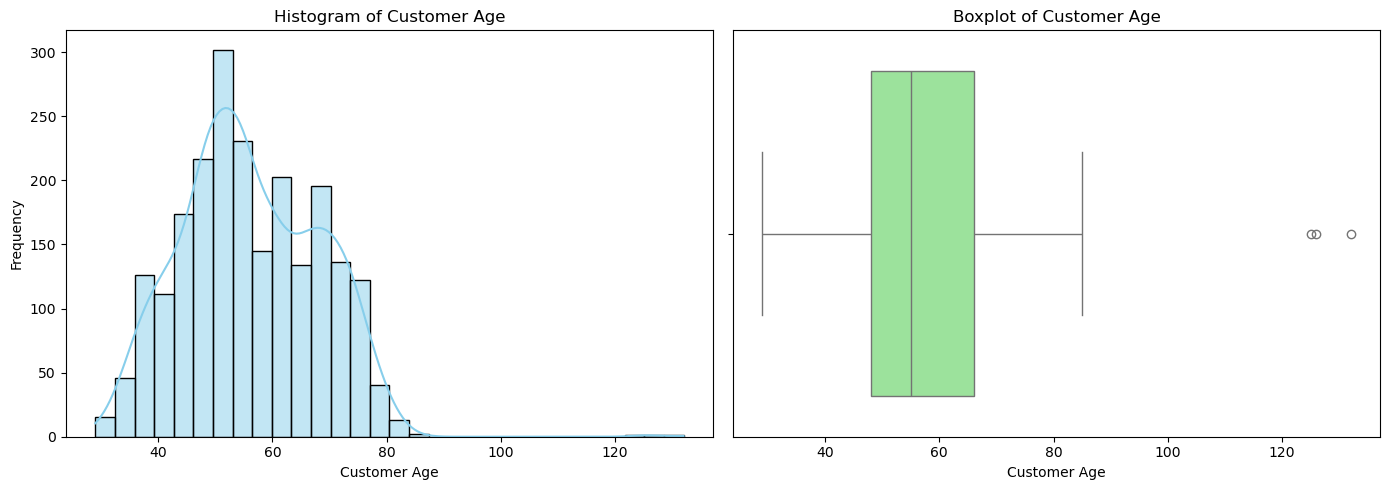

In [38]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(data["Customer_Age"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Histogram of Customer Age")
axes[0].set_xlabel("Customer Age")
axes[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(x=data["Customer_Age"], color="lightgreen", ax=axes[1])
axes[1].set_title("Boxplot of Customer Age")
axes[1].set_xlabel("Customer Age")

plt.tight_layout()
plt.show()

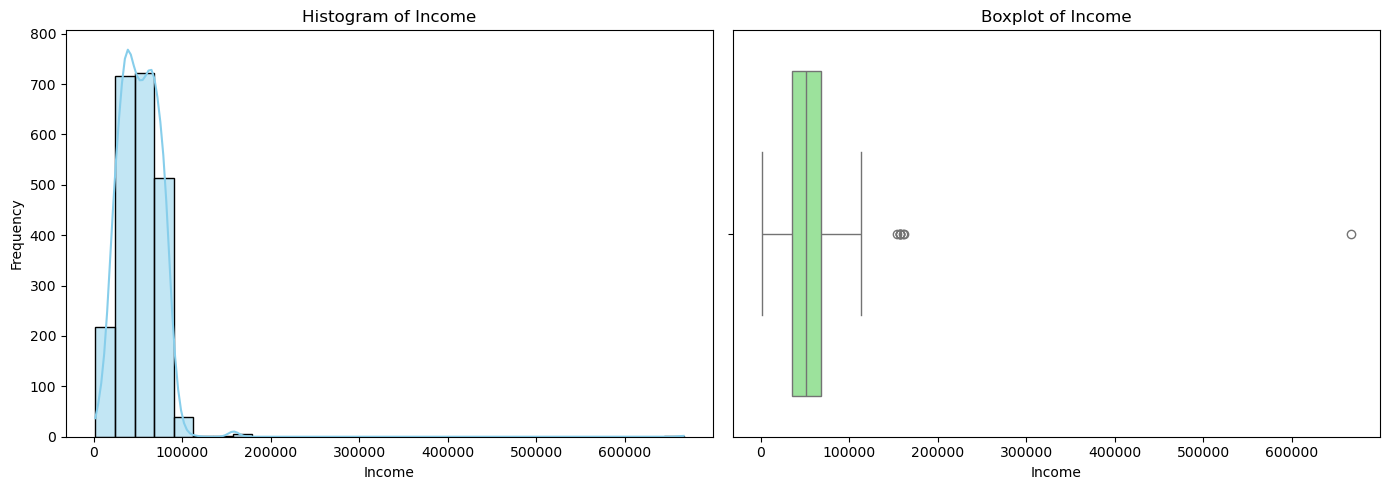

In [39]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(data["Income"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Histogram of Income")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(x=data["Income"], color="lightgreen", ax=axes[1])
axes[1].set_title("Boxplot of Income")
axes[1].set_xlabel("Income")

plt.tight_layout()
plt.show()


These graphs show us that, as we initially guessed, there are outliers for these two variables. We will remove from the dataset customers 100 years or older and also customers with an income higher than $600000. By doing this we expect that to remove these outliers that could mislead our customer segmentation algorithm.

In [40]:
data = data[data["Customer_Age"] < 100]
data = data[data["Income"] < 600000]

Additionaly, we will create one single variable corresponding to the total number of children the customer has, another variable for the total amount in purchases the client has made, a variable for the total number of purchases made (regardless of the channel where it was made), and finally a variable that explains the total number of offers the client has accepted regardless of the campaign number.

In [41]:
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Total_Purchased"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Num_Purchases"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"] 
data["Campaigns_Accepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

Moving forward with the analysis, we will analyse the categorical variables available in the dataset.

In [42]:
data["Education"].value_counts()

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [43]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

We can see that there are some opportunities to cleanup these variables. First, for the education variable we can see that there are multiple categories referring to the same level of education, for example, 2n Cycle and Master, or Graduation and Basic. Secondly, for the Marital Status variable we have a similar situation where Alone and Single, or Together and Married mean the same marital status. We will also remove from the dataset the rows that answered YOLO and Absurd in the marital status question. The following code groups the variables based on this finding

In [44]:
data["Education"] = data["Education"].replace(["PhD", "2n Cycle", "Graduation", "Master"],"Post Graduate")

data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "In a Relationship")
data["Marital_Status"] = data["Marital_Status"].replace(["Divorced", "Widow", "Alone"], "Single")
data = data[~data["Marital_Status"].isin({"YOLO", "Absurd"})]


After cleaning the marital status column, we can also determine the total number of people living in each customer's household

In [45]:
data["Household_Size"] = np.where(data["Marital_Status"] == "Single", 1, 0) + data["Kids"]

Now we can drop some variables that will not be used during the analysis

In [46]:
data.drop(columns = ["ID", "Year_Birth", "Dt_Customer", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Z_CostContact", "Z_Revenue", "Response"], inplace = True)

This is the dataset after the cleanup process and feature engineering process that we made:

In [47]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_For,Customer_Age,Kids,Total_Purchased,Num_Purchases,Campaigns_Accepted,Household_Size
0,Post Graduate,Single,58138.0,0,0,58,7,4689,68,0,1617,25,0,1
1,Post Graduate,Single,46344.0,1,1,38,5,4139,71,2,27,6,0,3
2,Post Graduate,In a Relationship,71613.0,0,0,26,4,4338,60,0,776,21,0,0
3,Post Graduate,In a Relationship,26646.0,1,0,26,6,4165,41,1,53,8,0,1
4,Post Graduate,In a Relationship,58293.0,1,0,94,5,4187,44,1,422,19,0,1


## Modelling

Before building our clustering algorithm, we will scale the numerical variables

In [48]:
numerical = data.drop(columns=["Education", "Marital_Status"]).values
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical)

We will also apply one hot encoding to the categorical variables

In [49]:
categorical = data[["Education", "Marital_Status"]]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cat = encoder.fit_transform(data[["Education", "Marital_Status"]])

data["Education_Enc"] = encoded_cat[:, 0]
data["Marital_Status_Enc"] = encoded_cat[:, 1]

X = np.hstack((encoded_cat, numerical_scaled))

To avoid any issue regarding multicolinearity and high dimensionality when running our clustering algorithm we will apply PCA.

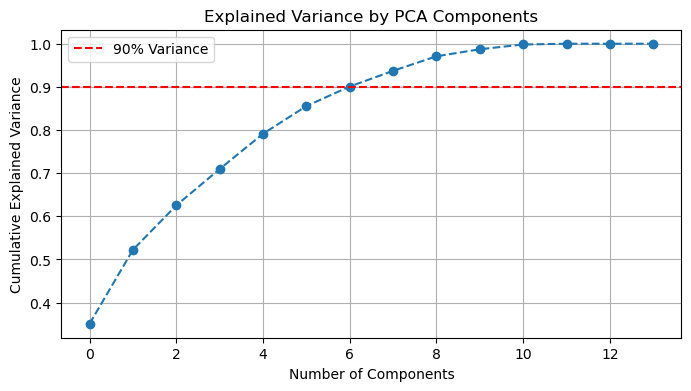

In [50]:
# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.axhline(y=0.90, color="r", linestyle="--", label="90% Variance")
plt.legend()
plt.show()


With 6 components, 90% of the variance is explained, leading us to proceed with this number for the rest of the analysis

In [51]:
pca_final = PCA(n_components = 6)
X_reduced = pca_final.fit_transform(X)

### K-Means Clustering

Now we are able to apply our K-Means clustering algorithm. We will begin by finding the optimal number of clusters based on the elbow method and the silhouette scores

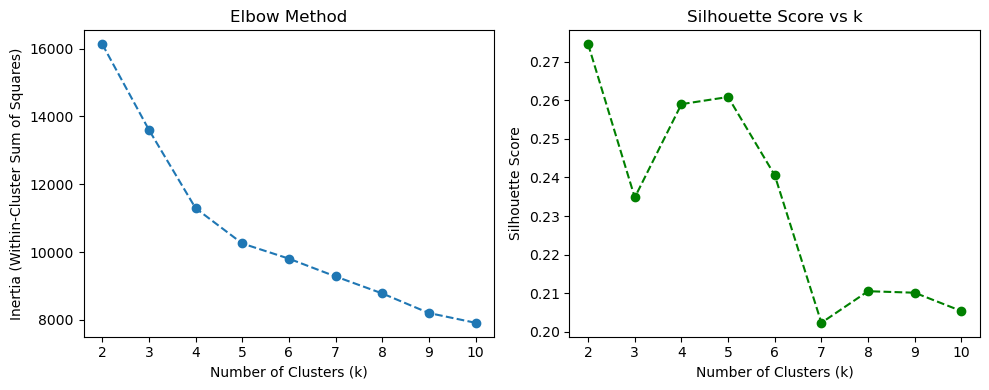

In [52]:
#X_reduced = X_scaled

# Test a range of k values
k_range = range(2, 11)
inertia = []
silhouette = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_reduced, kmeans.labels_))

# Plot elbow method
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()


The Elbow Method suggested 4 clusters as a good balance, while the Silhouette Score was highest between 4 to 5 clusters. However, 4 clusters were chosen because they balance cluster cohesion and business needs.

Now, we will train a K-Means algorithm that allows us to segment our client database based on the different features available

In [53]:
kmeans = KMeans(n_clusters=4, random_state=23)
cluster_labels = kmeans.fit_predict(X_reduced)

score = silhouette_score(X_reduced, cluster_labels)
print(f"Silhouette Score: {score:.3f}")
data["Cluster"] = cluster_labels


Silhouette Score: 0.259


After training the model we will profile each of the clusters to obtain key business insights around them

In [54]:
features_to_profile = data.drop(columns=["Education", "Marital_Status"])

cluster_profile = features_to_profile.groupby("Cluster").mean().round(2)
cluster_profile.T

Cluster,0,1,2,3
Income,77547.13,30309.88,58966.79,42452.15
Kidhome,0.02,0.76,0.07,1.05
Teenhome,0.03,0.04,0.95,1.04
Recency,49.48,48.86,48.35,49.94
NumWebVisitsMonth,2.57,6.87,5.26,6.37
Customer_For,4363.76,4376.31,4414.88,4347.44
Customer_Age,56.27,47.55,61.73,59.39
Kids,0.05,0.80,1.02,2.09
Total_Purchased,1382.93,123.22,751.74,178.76
Num_Purchases,20.09,8.26,19.78,10.77


We can also obtain the number of customers in each of the clusters

In [55]:
data["Cluster"].value_counts()

Cluster
2    665
1    615
0    497
3    431
Name: count, dtype: int64

We can interpret the clusters obtained as follows:

#### Cluster 0: Affluent Seniors, Loyal Buyers
- **Income**: The highest income level (~$77.5K)
- **Demographics**: Older customers (56 years), almost no children
- **Online Behavior**: Very low activity on web (2.6 visits per month)
- **Purchase Pattern**: The highest total purchases (1,382) and they respond most to campaigns (0.87)
- **Key Insight**: These are very valuable customers for long-term who prefer offline or direct offers

#### Cluster 1: Young Families, Low Income, High Web Use
- **Income**: Low income (~$30.3K)
- **Demographics**: Younger customers (47 years), high number of children at home (0.76), household size around 1.14
- **Online Behavior**: Heavy activity on web (6.87 visits per month)
- **Purchase Pattern**: Low spending and low acceptance of campaigns
- **Key Insight**: These customers are price-sensitive or they use web for research but don't buy easily

#### Cluster 2: Older Families, Moderate Income, High Spending
- **Income**: Moderate income (~$59K)
- **Demographics**: The oldest group (61.7 years), many teenagers in family (0.95)
- **Online Behavior**: Low visits to web
- **Purchase Pattern**: High total purchases (751), moderate response to campaigns (0.22)
- **Key Insight**: These customers are loyal but they don't use digital channels much; traditional marketing might work better

#### Cluster 3: Young Large Households, Low-Mid Income, Low Spend
- **Income**: Low to middle income (~$42.4K)
- **Demographics**: Age 59 years, the highest number of children (2.09), largest household size (2.47)
- **Online Behavior**: Active on web (6.4 visits per month)
- **Purchase Pattern**: Low purchases, they don't respond to campaigns
- **Key Insight**: Large families that probably shop for family needs but don't spend much. They might be budget shoppers

### DBSCAN

Now we will try fitting a DBSCAN model. The objective of this is to have two different models that allow us to compare the results and then pick the one that has the better performance metrics and that gives the bettter fit based on the business needs

In [56]:
dbscan = DBSCAN(eps=1.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(X_reduced)

data["DBSCAN_Cluster"] = dbscan_labels

# Number of clusters (excluding noise, labeled -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Estimated number of clusters: {n_clusters}")

score = silhouette_score(X_reduced, dbscan_labels)
print(f"Silhouette Score: {score:.3f}")


Estimated number of clusters: 2
Silhouette Score: 0.191


After training the model we will profile each of the clusters to obtain key business insights around them

In [57]:
valid_clusters = data[data["DBSCAN_Cluster"] != -1]
valid_clusters = valid_clusters.drop(columns=["Education", "Marital_Status", "Cluster"])

dbscan_profile = valid_clusters.groupby("DBSCAN_Cluster").mean().round(2)
dbscan_profile.T


DBSCAN_Cluster,0,1
Income,43992.55,75240.94
Kidhome,0.56,0.00
Teenhome,0.63,0.00
Recency,48.30,50.12
NumWebVisitsMonth,6.05,2.42
Customer_For,4385.84,4367.59
Customer_Age,55.52,57.49
Kids,1.18,0.00
Total_Purchased,355.03,1303.41
Num_Purchases,13.03,19.74


We can also obtain the number of customers in each of the clusters

In [58]:
data["DBSCAN_Cluster"].value_counts()


DBSCAN_Cluster
 0    1500
 1     381
-1     327
Name: count, dtype: int64

We can interpret the clusters obtained as follows:

#### Cluster 0: Larger Families, Low-Mid Income, Digital Users
- **Income**: Around $44K
- **Demographics**: Many children (1.18), larger households (1.52)
- **Online Behavior**: High activity on web (6.05 visits per month)
- **Purchase Pattern**: Lower total spending (355) and very low response to campaigns (0.10)
- **Key Insight**: These are budget-conscious families who browse a lot on web but they spend modestly and rarely respond to marketing offers

#### Cluster 1: Affluent Singles/Couples, High Loyalty
- **Income**: Around $75K
- **Demographics**: No children (0.00), small households (0.40)
- **Online Behavior**: Low activity on web (2.42 visits per month)
- **Purchase Pattern**: Very high total purchases (1,303) and good campaign responsiveness (0.32)
- **Key Insight**: High-value customers, possibly older people who prefer offline channels and are highly engaged buyers

## Model selection and Conclusions

We tested two different methods to group our customers: K-Means and DBSCAN. Both methods help us understand our customers better so we can create targeted marketing strategies.

**K-Means Results:** K-Means divided customers into four groups. This gave us detailed information about different customer types, such as wealthy loyal customers, young people who shop online, and large families who don't spend much. This method achieved a silhouette score of 0.23, indicating the groups were more separated and balanced than those produced by DBSCAN. With four groups, we can create very specific marketing campaigns for each type of customer.

**DBSCAN Results:** DBSCAN only found two customer groups, with a slightly lower score of 0.19. However, it showed a very clear difference between two main customer types:

* High-value customers: earn about $75,000 per year and spend about $1,300
* Budget-conscious families: earn about $44,000 per year and spend about $355

This simple two-group structure makes it easier to make business decisions. Companies can focus on offering premium products to high-value customers, while creating affordable, online-focused strategies for budget-conscious families. The two groups also behave differently online, which helps with choosing the right marketing channels.

**Final Decision:** Even though DBSCAN provides clearer and more focused insights, we chose K-Means as our final method. We made this choice because it had a better silhouette score (0.23), provided more detailed customer groups, and gave us better information for creating specific customer profiles and marketing strategies.